# **YOUTUBE SENTIMENT ANALYST**

-----------------------------------------------------------------------

## *------1. Taking and processng input data------*

In [27]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

` reading csv file to process `

In [28]:
Link=r'E:\My_Plan\Python\Update Myself\DA_youtube'
Namefile=r'\UScomments.csv'
source=Link+Namefile
comments=pd.read_csv(source,error_bad_lines=False)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


` Import "textblog" lib to evaluate comment's quality `

In [30]:
from textblob import TextBlob

` Checking number of N/A value in dataframe `

In [31]:
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

` Droping N/A values out of dataframe `

In [32]:
comments.dropna(inplace=True)
comments.isna().sum()


video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

* ` Polarity figure describes loving level of comments which based on some noun-pharse or emoji or eventhough a positive/negative word . ` 
* ` If they positive, they'll greater than 0 and vice versa. It's positive when polarity figure is 1  ` 

In [33]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).polarity)


In [34]:
comments['Polarity']=polarity
comments.head()

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


-------------------------------------------------------------

## *-----2. Processing & visualizing positive/negative comments/sentiments------*

` Taking data having Polarity figure is 1 to prepare data for visualize positive sentiment & Polarity figure is -1 for negative sentiment  `

In [35]:
Pos_sen=comments[comments['Polarity']==1]
Neg_sen=comments[comments['Polarity']==-1]

* ` Import wordcloud to visualize data `
* ` The size of word is depend on how many time that word appear `

In [36]:
from wordcloud import WordCloud,STOPWORDS


` Processing input to apply wordcloud ` 

In [37]:
All_Pos_sen=' '.join(Pos_sen['comment_text'])
All_Neg_sen=' '.join(Neg_sen['comment_text'])

In [38]:
stopwords=set(STOPWORDS)
wordcloud_Pos=WordCloud(width=2000,height=1000,background_color='white',stopwords=stopwords,min_font_size=35).generate(All_Pos_sen)
wordcloud_Neg=WordCloud(width=2000,height=1000,background_color='black',stopwords=stopwords,min_font_size=35).generate(All_Neg_sen)

` Visualize `

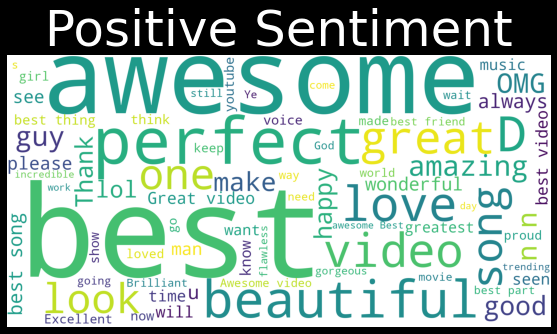

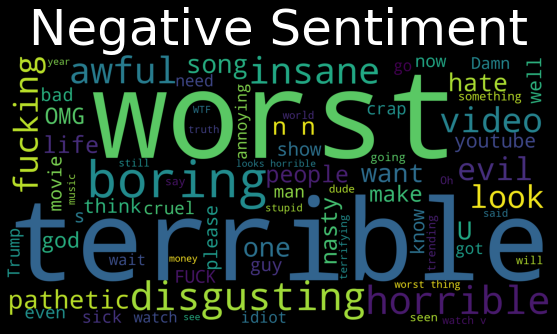

In [39]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_Pos)
plt.title('Positive Sentiment',fontsize=50)
plt.axis("off")
plt.show()
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_Neg)
plt.title('Negative Sentiment',fontsize=50)
# plt.title('Polarity=-1',fontsize=20)
plt.axis("off")
plt.show()

---------------------------------

## *-----3. Processing trending tag on youtube and visualizing trend following view & like or dislike by regression-----*

In [40]:
Link_vid=r'E:\My_Plan\Python\Update Myself\DA_youtube'
Name_vid=r'\USvideos.csv'
Source_vid=Link_vid+Name_vid
video_df=pd.read_csv(Source_vid,error_bad_lines=False)
video_df.head()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


` Processing tag data and visualize this data `

In [41]:
vid_tag=''.join(video_df['tags'])
import re
tag_process=re.sub('[^a-zA-Z]',' ',vid_tag) #taking alphabet values if non-alphabet is replaced by space
tags=re.sub(' +',' ',tag_process) #replace more than 1 space to 1 space only

Text(0.5, 1.0, 'Tags')

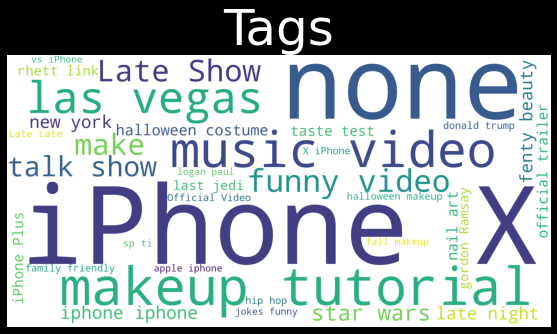

In [42]:
wordcloud_tags=WordCloud(width=2000,height=1000,background_color='white',stopwords=stopwords,min_font_size=35).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_tags)
plt.axis('off')
plt.title('Tags',fontsize=50)

` Giving correlation of views and likes/dislikes `

In [43]:
video_df_corr=video_df[['views','likes','dislikes']].corr(method='pearson')
video_df_corr

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


* ` r(view/like)=0.866 is quite good so linear regression is so suitable`
* ` r(view/dislike)=0.67 isn't quite good so linear regression is maybe not suitable `
* ` SOoooooooooooo, Choosing views and like to visualize `

` Set up for graph. just make up for it =)) `

In [44]:
import seaborn as sns
plt.style.use('dark_background')
# sns.set(style="ticks", context="talk")

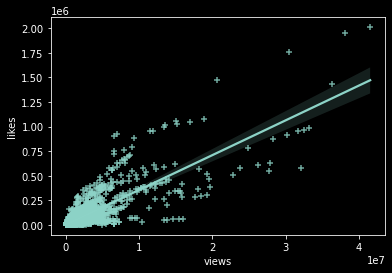

In [45]:
sns.regplot(data=video_df,x='views',y='likes',marker='+')
plt.show()

<AxesSubplot:>

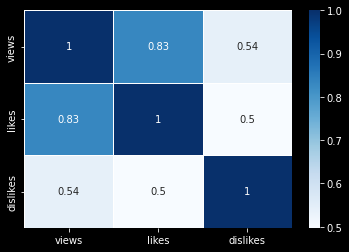

In [46]:
sns.heatmap(video_df_corr,annot=True,linewidths=.5,cmap='Blues')

----------------------------------

## *------4. Analysis the number of emoji in comments and Visualize top 20 popular emoji in comments to evaluate the trend of this------*

In [47]:
import emoji

In [48]:
# str_emo=''
# for i in comments['comment_text']:
#    for k in i:
#       if k in emoji.UNICODE_EMOJI['en']:
#          str_emo+=k



In [49]:
str_emo=''
for i in comments['comment_text']:
    emo01=tuple([c for c in i if c in emoji.UNICODE_EMOJI['en']])
    # result="".join(emo01) Không biết tại sao dùng này thì k ra =))) 
    for k in emo01:
        str_emo+=k

` Store emoji and number of this in dictionary with key: emoji and value: the number of that emoji `

In [50]:
dict_emo={}
for i in set(str_emo):
    dict_emo[i]=str_emo.count(i)
sorted_emo=sorted(dict_emo.items(),key=lambda x :x[1],reverse=True)
# From per tuple sort by the index 1 of this tuple
top20_emo=sorted_emo[0:20]
top20_emo


[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549),
 ('🤣', 2279)]

In [51]:
emo_list=[i[0] for i in top20_emo]
no_emo=[i[1] for i in top20_emo]

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128150 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINT

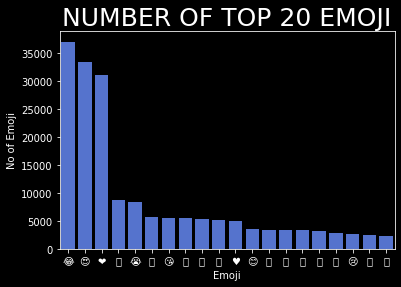

In [52]:
barplt=sns.barplot(x=emo_list,y=no_emo,color='royalblue')
plt.title('NUMBER OF TOP 20 EMOJI',size=25)
plt.xlabel('Emoji')
plt.ylabel('No of Emoji')
plt.show()